In [1]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import tflite
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize,pyramid_reduce

In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np


class MobilNetClassifier:
    def __init__(self):
        self.model_path = 'Mobilnet.tflite'
        self.class_labels = ['Apple__Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple__healthy',
                             'Blueberry__healthy', 'Cherry(including_sour)__Powdery_mildew', 'Cherry(including_sour)___healthy',
                             'Corn_(maize)__Cercospora_leaf_spot Gray_leaf_spot', 'Corn(maize)__Common_rust',
                             'Corn_(maize)__Northern_Leaf_Blight', 'Corn(maize)__healthy', 'Grape__Black_rot',
                             'Grape__Esca(Black_Measles)', 'Grape__Leaf_blight(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                             'Orange__Haunglongbing(Citrus_greening)', 'Peach__Bacterial_spot', 'Peach__healthy',
                             'Pepper,bell_Bacterial_spot', 'Pepper,_bell_healthy', 'Potato__Early_blight',
                             'Potato__Late_blight', 'Potato_healthy', 'Raspberry_healthy', 'Soybean__healthy',
                             'Squash__Powdery_mildew', 'Strawberry_Leaf_scorch', 'Strawberry__healthy',
                             'Tomato__Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato__Leaf_Mold',
                             'Tomato__Septoria_leaf_spot', 'Tomato__Spider_mites Two-spotted_spider_mite',
                             'Tomato__Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 'Tomato__Tomato_mosaic_virus',
                             'Tomato___healthy']

        self.interpreter = tf.lite.Interpreter(model_path=self.model_path)
        self.interpreter.allocate_tensors()

        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()

    def preprocess_image(self, image_path):
        image = Image.open(image_path).convert('RGB')
        input_shape = self.input_details[0]['shape'][1:3]
        image = image.resize(input_shape)
        image_array = np.array(image) / 255.0  # Normalize image pixels to [0, 1]
        image_array = np.expand_dims(image_array, axis=0)
        return image_array

    def classify_image(self, image_path):
        image_array = self.preprocess_image(image_path)

        # Set the input tensor
        self.interpreter.set_tensor(self.input_details[0]['index'], image_array.astype(np.float32))

        # Run inference
        self.interpreter.invoke()

        # Get the output tensor
        output_tensor = self.interpreter.get_tensor(self.output_details[0]['index'])

        # Get the predicted class index
        predicted_idx = np.argmax(output_tensor)

        # Get the predicted class label
        predicted_label = self.class_labels[predicted_idx]

        return predicted_label

In [4]:
# Example usage
classifier = MobilNetClassifier()
image_path = 'test/test/AppleCedarRust1.JPG'
predicted_label = classifier.classify_image(image_path)
print("Predicted label:", predicted_label)

Predicted label: Apple_Cedar_apple_rust


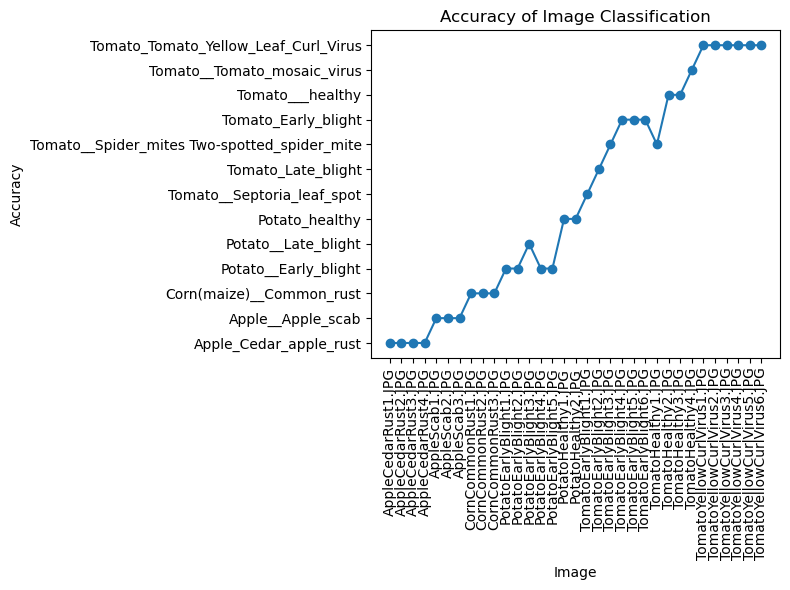

In [16]:
import os
import matplotlib.pyplot as plt

# Specify the directory containing the images
folder_path = "test/test/"

# Create an instance of the MobileNetClassifier
classifier = MobilNetClassifier()

# Lists to store the accuracy values and image filenames
accuracy_values = []
image_filenames = []

# Iterate over the image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".png"):  # Adjust the file extensions if needed
        image_path = os.path.join(folder_path, filename)
        predicted_label = classifier.classify_image(image_path)
        
        # Store the accuracy value and image filename
        accuracy_values.append(predicted_label)  # Adjust this to your actual accuracy calculation
        image_filenames.append(filename)
# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(image_filenames, accuracy_values, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Image')
plt.ylabel('Accuracy')
plt.title('Accuracy of Image Classification')
plt.tight_layout()
plt.show()